# fitting

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
curvefit = scipy.optimize.curve_fit

In [2]:
def fitting(x,sigma):
    norm = scipy.stats.norm.pdf
    return norm(x,0,sigma)

In [143]:
N = 80
R_m = []
R_s = []
R_std = []
S_s = []
for i in range(1,N+1):
    
    A = np.load(f'dt=0.01/N={N},k={i}.npz')
    rs = A['rs']
    Qs = A['Qs']
    r_std = np.std(rs)
    r_m = np.mean(rs)
    R_m.append(r_m)
    R_s.append(rs)
    R_std.append(r_std)
    Q,C = np.unique(Qs, return_counts=True)
    P = C/ np.sum(C)
    popt, pcov  = curvefit(fitting,Q,P)
    S_s.append(*popt)

# glob.glob('N=80,*')

In [135]:
N = 60
R_m = []
R_s = []
R_std = []
S_s2 = []
ks2 = np.arange(1,N+1)
for i in ks2:
    
    A = np.load(f'dt=0.01/N={N},k={i}.npz')
    rs = A['rs']
    Qs = A['Qs']
    r_std = np.std(rs)
    r_m = np.mean(rs)
    R_m.append(r_m)
    R_s.append(rs)
    R_std.append(r_std)
    Q,C = np.unique(Qs, return_counts=True)
    P = C/ np.sum(C)
    popt, pcov  = curvefit(fitting,Q,P)
    S_s2.append(*popt)

# glob.glob('N=80,*')

In [138]:
N = 80
ks = np.arange(1,N+1)

(2.0, 9.341485505499117)

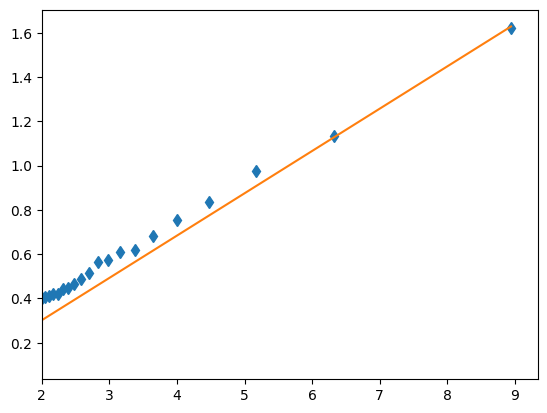

In [146]:
plt.plot(np.sqrt(80/ks),S_s,'d')
plt.plot(np.sqrt(80/ks),0.191*np.sqrt(80/ks)-0.08)
plt.xlim(2,)
# plt.plot(np.sqrt(60/ks2),S_s2)

In [141]:
N = 60
R2_m = []
R2_s = []
R2_std = []

for i in range(1,N+1):
    
    A = np.load(f'dt=0.01/N={N},k={i}.npz')
    rs = A['rs']
    r_std = np.std(rs)
    r_m = np.mean(rs)
    R2_m.append(r_m)
    R2_s.append(rs)
    R2_std.append(r_std)
    
# glob.glob('N=80,*')

In [132]:
len(R_m)

79

(0.0, 0.4)

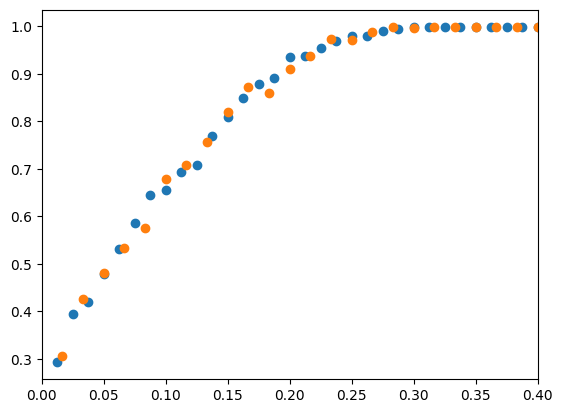

In [144]:
plt.scatter(np.arange(1,80+1)/80,R_m)
plt.scatter(np.arange(1,60+1)/60,R2_m)
plt.xlim(0,0.4)
plt.a

In [112]:
def fitting(x,sigma):
    norm = scipy.stats.norm.pdf
    return norm(x,0,sigma)

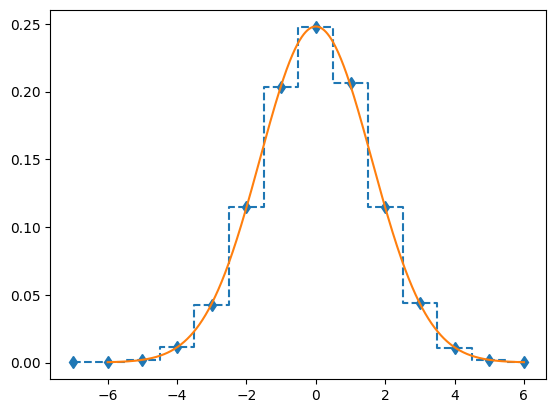

In [13]:
N = 80
for i in range(1,2):
# A = np.load(f'dt=0.01/N={N},k={i}.npz')
    # A = np.load(f'N={N},k={i}.npz')
    A = np.load(f'dt=0.01/N={N},k={i}.npz')
    rs = A['rs'][:]
    Qs = A['Qs'][:]
    x = np.linspace(-6,6,10000)

    Q,C = np.unique(Qs, return_counts=True)
    P = C/ np.sum(C)
    popt, pcov  = curvefit(fitting,Q,P)
    plt.plot(Q,P,'d--',drawstyle='steps-mid')
    plt.plot(x,fitting(x,popt))

In [176]:
popt

array([1.60806391])

In [170]:
Q,C = np.unique(Qs, return_counts=True)
P = C/ np.sum(C)
# plt.bar(*np.unique(Qs, return_counts=True))

In [171]:
popt, pcov  = curvefit(fitting,Q,P)
popt

array([1.6104161])

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_89318/2423031854.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(Q,P,'d-',drawstyle='steps-mid',ls='--')


array([1.6104161])

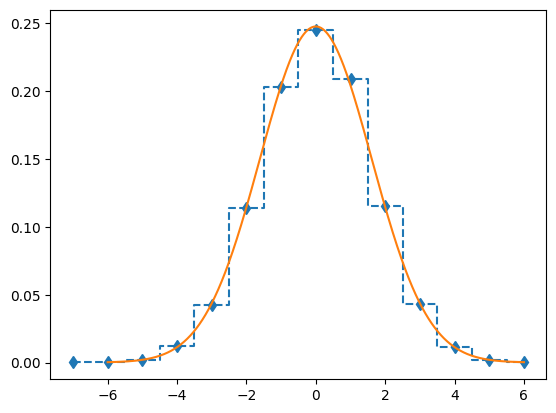

In [173]:
# plt.plot(Q,P,'d')
plt.plot(Q,P,'d-',drawstyle='steps-mid',ls='--')
# plt.hist(Qs,bins=100,density=True)
plt.plot(x,fitting(x,popt))
popt

In [5]:
N = 80
k = 1
Aij = np.zeros((N,N))
for i in range(N):
    j = np.arange((i-k),(i+k+1),1)%N
    Aij[i,j]= 1
    Aij[i,i] = 0

In [8]:
Lij = np.eye(N)*2  - Aij

In [11]:
ev,eV = np.linalg.eig(-Lij)

In [12]:
ev

array([ 0.        , -4.        , -3.97537668, -3.99383467, -3.90211303,
       -3.84775907, -3.99383467, -3.78201305, -0.02462332, -0.00616533,
       -0.00616533, -3.97537668, -0.15224093, -0.05526016, -3.84775907,
       -3.90211303, -0.02462332, -3.70528033, -3.78201305, -0.21798695,
       -0.05526016, -0.21798695, -0.15224093, -3.70528033, -3.52081193,
       -3.41421356, -0.29471967, -0.47918807, -3.2988961 , -0.29471967,
       -3.52081193, -3.41421356, -3.04499713, -0.58578644, -0.58578644,
       -3.2988961 , -0.47918807, -0.95500287, -1.092019  , -3.94473984,
       -0.7011039 , -0.95500287, -2.        , -1.092019  , -1.68713107,
       -3.04499713, -1.53310927, -1.23463314, -3.94473984, -2.907981  ,
       -0.7011039 , -1.53310927, -2.907981  , -1.68713107, -1.84308181,
       -2.15691819, -2.        , -2.76536686, -1.23463314, -2.15691819,
       -3.61803399, -2.31286893, -2.31286893, -0.38196601, -1.38196601,
       -2.61803399, -0.09788697, -0.8244295 , -2.61803399, -1.38